# **Unsupervised clustering for the given data**
### **Author: Abhishek Dubey**
### **Linkedin**: https://www.linkedin.com/in/abhishek-dubey96/
### **Email**: abhishekdb.1996@gmail.com
### **Github**: https://github.com/Abhiee8322
### **Contact number**: 9560296924
Text is everywhere in the form of opinions, complaints, news and information; each of us are contributing in general to put text throughout the internet. The large amount of text which is present in the unstructured format can be used for welfare of the society and businesses by analysing the sentiments and trends. A part of NLP deals with Text processing and analysis. 

Commonly available text can not be directly used for analysis, it needs to pre-processed first, and that is where NLTK, the most popular library for text processing in Python, comes into the picture.


In this project I have performed unsupervized learning on the given textual data.
Following are the steps taken:
1. Imported neccessary libraries.
2. Load the data
3. Basic inspection of the data.
4. Text cleaning(Removed punctuation, whitespaces, lowercase the text).
5. Text Pre-Processing(Removed stopwords, tokenisation, lemmatization)
6. Copying the cleaned data into a variable
7. Data vizualization
8. Plotted Word-cloud
9. Plotted most occuring words/log-log plot.
10. Converted the words into vector using TF-IDF vectorizer.
11. Graph of summary of silhoutte score obtained from the clustering models.
12. Kmeans clustering.
13. Checking the number of clusters using elbow method and silhoutte graph.
14. Model validation and generating cluster labels.
15. Summary of data points in different clusters.
16. retrieving data based upon cluster made.
17. Cluster labelling.
18. DBSCAN model and its optimization 
19. Birch model  

##### Loading all the necessary libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import csv
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


# for all NLP related operations on text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import string 
punctuation = string.punctuation 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading the dataset

In [ ]:
df = pd.read_csv('/content/Patient_Details (1).csv',encoding='ISO-8859-1')

#### Checking out the text present in the dataset

In [ ]:
df

,TEXT
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better""."
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself."
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours"
4,"Injection site swelling, redness, warm to the touch and itchy"
...,...
494,"Tachycardia with a heart rate in the 120-140s, fever, fatigue, muscle weakness, joint weakness, and headache"
495,"Strong chills, with uncontrollable and vigorous shaking and teeth chattering"
496,Fever chills severe myalgia headache
497,"Middle of the night woke up shivering, chills, fever, bones ached, could not even lift my arm it was so sore and under armpit. Symptoms lasted all day. Next night woke up out of sleep symptoms even worse. Next day same symptoms but now a hard ball that hurts formed near clavicle on side of vaccinated arm. Arm, armpit, clavicle area on right side now all hurt."


#### In order to see the full text, expanding the column width

In [ ]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
df.head()

,TEXT
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better""."
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself."
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours"
4,"Injection site swelling, redness, warm to the touch and itchy"


## Text cleaning starts, here I would be removing punction, lowering the case of text, removing extra white spaces and eradicating html tags, putting the cleaned text into cleaned_txt column

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
  
#storing the puntuation free text
df['clean_txt']= df['TEXT'].apply(lambda x:remove_punctuation(x))

## Lowercasing the words
df['clean_txt']= df['clean_txt'].apply(lambda x: x.lower())

## Removing extra whitespaces

def remove_whitespaces(input):
  """
  Returns text without extra whitespaces
  """
  return " ".join(input.split())


#applying function to the column
df['clean_txt']= df['clean_txt'].apply(lambda x: remove_whitespaces(x))

## Removing html tags if found any

def remove_html_tags(input):
  """
  Returns text without HTML tags
  """
  soup = BeautifulSoup(input, "html.parser")
  stripped_input = soup.get_text(separator=" ")
  return stripped_input
  df['clean_txt']= df['clean_txt'].apply(lambda x: remove_html_tags(x))

  

df.head()

,TEXT,clean_txt
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,right side of epiglottis swelled up and hinder swallowing pictures taken benadryl tylenol taken
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".",approximately 30 min post vaccination administration patient demonstrated sob and anxiousness assessed at time of event heart sounds normal lung sounds clear vitals within normal limits for patient o2 91 on 3 liters nc continuous flow 2 consecutive nebulized albuterol treatments were administered at approximately 15 hours post reaction patients sob and anxiousness had subsided and the patient stated that they were feel much better
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself.",about 15 minutes after receiving the vaccine the patient complained about her left arm hurting she also complained of chest tightness and difficulty swallowing patient also had vision changes we gave the patient 1 tablet of benadryl 25 mg and called ems services ems checked her out and we advised the patient to go to the er to be observed and given more benadryl patient was able to walk out of facility herself
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours",extreme fatigue dizziness could not lift my left arm for 72 hours
4,"Injection site swelling, redness, warm to the touch and itchy",injection site swelling redness warm to the touch and itchy


## Text Preprocessing starts here would be tokenising the words out of the sentence, removing stopwords, lemmatizing the words(to keep the root word intact and do not loose the semantic meaning of the text)

In [ ]:
## Tokenizing the text
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)   
## Applying the custom_tokenize function    
df['clean_txt'] = df['clean_txt'].apply(custom_tokenize)

#defining the function to remove stopwords from tokenized text
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['clean_txt']= df['clean_txt'].apply(lambda x:remove_stopwords(x))   

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df['clean_txt']=df['clean_txt'].apply(lambda x:lemmatizer(x))





In [ ]:
df

,TEXT,clean_txt
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,"[right, side, epiglottis, swelled, hinder, swallowing, picture, taken, benadryl, tylenol, taken]"
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".","[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, anxiousness, assessed, time, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, patient, o2, 91, 3, liter, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatment, administered, approximately, 15, hour, post, reaction, patient, sob, anxiousness, subsided, patient, stated, feel, much, better]"
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself.","[15, minute, receiving, vaccine, patient, complained, left, arm, hurting, also, complained, chest, tightness, difficulty, swallowing, patient, also, vision, change, gave, patient, 1, tablet, benadryl, 25, mg, called, em, service, em, checked, advised, patient, go, er, observed, given, benadryl, patient, able, walk, facility]"
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours","[extreme, fatigue, dizziness, could, lift, left, arm, 72, hour]"
4,"Injection site swelling, redness, warm to the touch and itchy","[injection, site, swelling, redness, warm, touch, itchy]"
...,...,...
494,"Tachycardia with a heart rate in the 120-140s, fever, fatigue, muscle weakness, joint weakness, and headache","[tachycardia, heart, rate, 120140s, fever, fatigue, muscle, weakness, joint, weakness, headache]"
495,"Strong chills, with uncontrollable and vigorous shaking and teeth chattering","[strong, chill, uncontrollable, vigorous, shaking, teeth, chattering]"
496,Fever chills severe myalgia headache,"[fever, chill, severe, myalgia, headache]"
497,"Middle of the night woke up shivering, chills, fever, bones ached, could not even lift my arm it was so sore and under armpit. Symptoms lasted all day. Next night woke up out of sleep symptoms even worse. Next day same symptoms but now a hard ball that hurts formed near clavicle on side of vaccinated arm. Arm, armpit, clavicle area on right side now all hurt.","[middle, night, woke, shivering, chill, fever, bone, ached, could, even, lift, arm, sore, armpit, symptom, lasted, day, next, night, woke, sleep, symptom, even, worse, next, day, symptom, hard, ball, hurt, formed, near, clavicle, side, vaccinated, arm, arm, armpit, clavicle, area, right, side, hurt]"


## Copying the cleaned text into a variable sentence

In [ ]:
sentences = df['clean_txt']

In [ ]:
sentences

0      [right, side, epiglottis, swelled, hinder, swallowing, picture, taken, benadryl, tylenol, taken]                                                                                                                                                                                                                                                                                                                                       
1      [approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, anxiousness, assessed, time, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, patient, o2, 91, 3, liter, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatment, administered, approximately, 15, hour, post, reaction, patient, sob, anxiousness, subsided, patient, stated, feel, much, better]
2      [15, minute, receiving, vaccine, patient, complained, left, arm, hurting, also, complained, chest, tightness, difficulty, swallowin

## For the vectorizer to identify the text convering the text into string datatype

In [ ]:
sentences = sentences.astype(str)
sentences

0      ['right', 'side', 'epiglottis', 'swelled', 'hinder', 'swallowing', 'picture', 'taken', 'benadryl', 'tylenol', 'taken']                                                                                                                                                                                                                                                                                                                                                                                                                       
1      ['approximately', '30', 'min', 'post', 'vaccination', 'administration', 'patient', 'demonstrated', 'sob', 'anxiousness', 'assessed', 'time', 'event', 'heart', 'sound', 'normal', 'lung', 'sound', 'clear', 'vitals', 'within', 'normal', 'limit', 'patient', 'o2', '91', '3', 'liter', 'nc', 'continuous', 'flow', '2', 'consecutive', 'nebulized', 'albuterol', 'treatment', 'administered', 'approximately', '15', 'hour', 'post', 'reaction', 'patient', 'sob', 'anxious

## Text Visualization

#### Generating word cloud

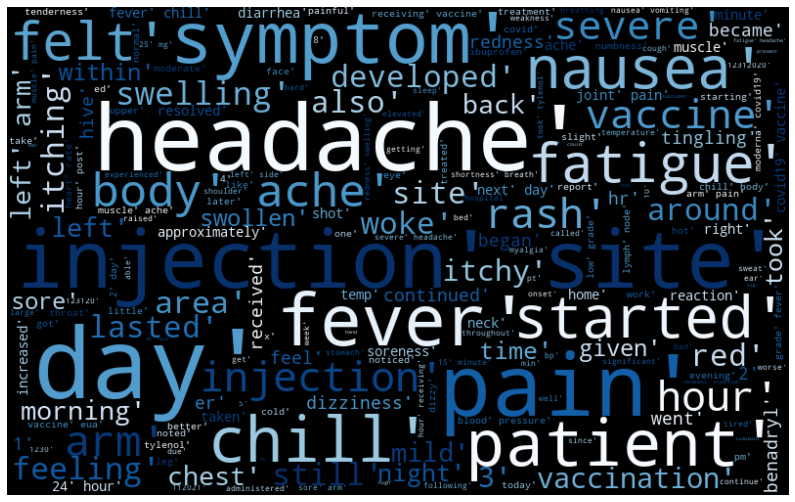

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Blues_r').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

all_words = ' '.join([text for text in sentences])
generate_wordcloud(all_words)    

##### 'headache','fever','chill' are the most frequent words

#### Let's see the most occuring word in the dataset

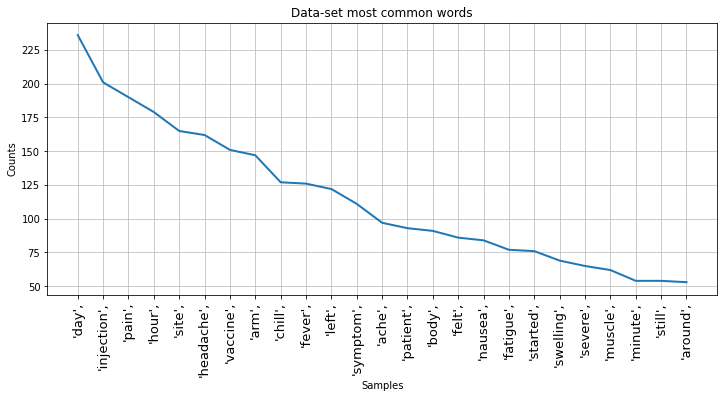

Text(0.5, 1.0, 'log-log plot of words frequency')

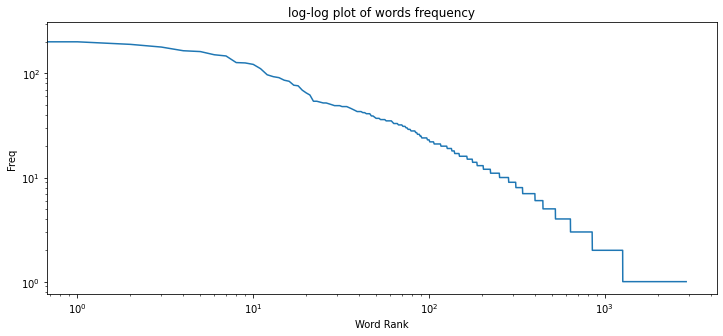

In [ ]:
all_words = []
for line in list(sentences):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)
plt.figure(figsize=(12,5))
plt.title('Data-set most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

## Converting the words into vectors, here I have used TF-IDF vectorizer.

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)

### Unsupervised clustering modelling starts, here in this problem statement I have used **3 models**, i.e. **K-Means**, **DBSCAN**(*Density-based spatial clustering of applications with noise*), **BIRSCH**(*Balanced Iterative Reducing and Clustering using Hierarchies*)

### Here a graph is represented showing the silhoutte score values that are obtained after training the above three clustering models

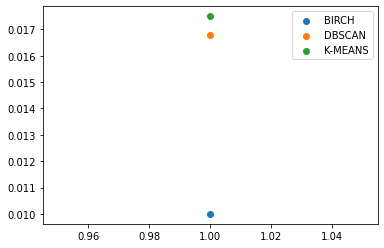

In [ ]:
x=[1]
y=[.010,.0168,.0175] ## Accuracy score obtained from models
for i in y:
  plt.scatter(x,y=i)
plt.legend(["BIRCH" , "DBSCAN","K-MEANS"])
plt.show()

### What I infer from the graph is that **K-means** gave the ***highest silhoutte score*** among the three models

In [ ]:
from sklearn.cluster import KMeans

### Running the simple vanilla K-Means clustering model in which for instance number of clusters has been taken as 5

In [ ]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Plotting the wcss vs the number of clusters, through elbow method

In [ ]:
no_of_clusters = range(1,7)
wcss=[]

Text(0, 0.5, 'WCSS')

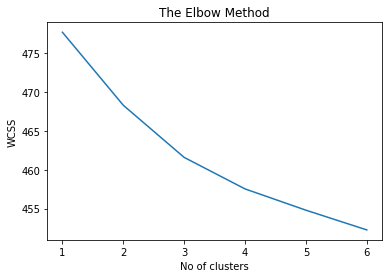

In [ ]:
for k in no_of_clusters:
    # Creating a Kmeans class instance with k clusters
    model = KMeans(n_clusters=k, random_state=15)
    # Build the model using the data
    model.fit(X)
    # Append the inertia (wcss) to the list named "wcss"
    wcss.append(model.inertia_)

plt.plot(no_of_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')   

## Model validation, i.e. Plotting Average Silhoutte plot(to determine optimal number of clusters and getting the silhoutte score)

Text(0, 0.5, 'Silhouette Coefficient')

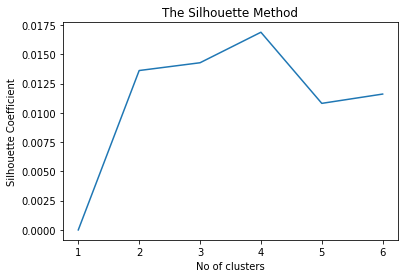

In [ ]:
from sklearn.metrics import silhouette_score

no_of_clusters = list(range(2,7))
silhouette_score_list = []

for k in no_of_clusters:
    # Creating a Kmeans class instance with k clusters
    model = KMeans(n_clusters=k, random_state=15)
    
    # Build the model using the data and predict the clusters
    clusters = model.fit_predict(X)
    
    # Append the inertia (wcss) to the list named "wcss"
    silhouette_score_list.append(silhouette_score(X,clusters))

no_of_clusters.insert(0,1)
silhouette_score_list.insert(0,0)
plt.plot(no_of_clusters,silhouette_score_list)
plt.title('The Silhouette Method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Coefficient')

## Through this method We can infer that optimal number of cluster is 4, and the score obtained is .0175

## Bar plot to see the number of clusters

#### Silhoutte score visualization for different ideal number of clusters(K-Means)

Text(0, 0.5, 'Silhouette Coefficient')

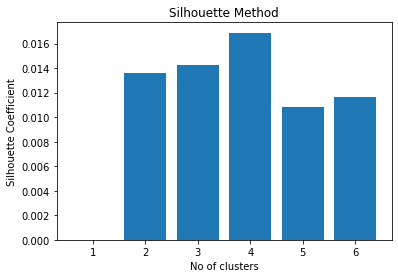

In [ ]:
plt.bar(no_of_clusters,silhouette_score_list)
plt.title('Silhouette Method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Coefficient')

## Making the **final model** based upon the ***optimum number of cluster*** obtained in previous step

## Here cluster_labels contains the **predicted cluster values** based upon the data that is fitted into the model.

## cluster_labels are then initialised into the cluster variable of the dataset

In [ ]:
model = KMeans(n_clusters=4,init = "k-means++" ,random_state=15)
cluster_labels = model.fit_predict(X)
df['Cluster'] = cluster_labels
cluster_labels

array([2, 0, 0, 2, 1, 0, 3, 2, 1, 2, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 3, 2, 1, 2,
       2, 3, 3, 3, 1, 3, 1, 2, 2, 3, 0, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 3,
       1, 3, 1, 3, 0, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 1, 2, 3,
       1, 1, 3, 0, 1, 3, 2, 3, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 3, 3, 2, 3,
       2, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 2, 3, 2, 3, 1, 3, 3, 3, 3, 2,
       2, 3, 3, 1, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0,
       2, 1, 2, 1, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1,
       2, 1, 1, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       3, 3, 1, 1, 2, 2, 2, 0, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 3, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 3, 0, 2, 2, 3, 2,
       2, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 1, 3, 3, 0,

## Summary of values that are in cluster **variable**

In [ ]:
df['Cluster'].value_counts()

2    238
3    130
1    95 
0    36 
Name: Cluster, dtype: int64

## Getting the ***centroid values*** and extracting the terms corresponding to the values

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
 print("Cluster %d:" % i),
 for ind in order_centroids[i,:4]:
  print(' %s' % terms[ind])

Cluster 0:
 patient
 reported
 vaccination
 minute
Cluster 1:
 injection
 site
 day
 redness
Cluster 2:
 day
 hour
 arm
 left
Cluster 3:
 chill
 ache
 fever
 headache


## Predicting to **check whether our clusters** have been made properly or not

In [ ]:

print("Prediction")
X_pred = vectorizer.transform(["after putting the vaccine, i am feeling feverish and headache"])
predicted = model.predict(X_pred)
print(predicted)

Prediction
[2]


## Extracting the text into cluster variable in correspondence to the cluster numbers

In [ ]:
cluster_1 = df[df['Cluster']==0]
cluster_2 = df[df['Cluster']==1]
cluster_3 = df[df['Cluster']==2]
cluster_4 = df[df['Cluster']==3]

In [ ]:
cluster_1

,TEXT,clean_txt,Cluster
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".","[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, anxiousness, assessed, time, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, patient, o2, 91, 3, liter, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatment, administered, approximately, 15, hour, post, reaction, patient, sob, anxiousness, subsided, patient, stated, feel, much, better]",0
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself.","[15, minute, receiving, vaccine, patient, complained, left, arm, hurting, also, complained, chest, tightness, difficulty, swallowing, patient, also, vision, change, gave, patient, 1, tablet, benadryl, 25, mg, called, em, service, em, checked, advised, patient, go, er, observed, given, benadryl, patient, able, walk, facility]",0
5,patient called back the next day and stated her throat was swelling and had to take Benadryl.,"[patient, called, back, next, day, stated, throat, swelling, take, benadryl]",0
76,"Reported feeling shaky and a racing heartbeat. Per the ED physician's notes, by the time patient was evaluated in the ED, her symptoms had resolved and she was released from care with no additional follow-up necessary.","[reported, feeling, shaky, racing, heartbeat, per, ed, physician, note, time, patient, evaluated, ed, symptom, resolved, released, care, additional, followup, necessary]",0
92,"Patient received first dose of moderna covid-19 vaccine EUA. She is an employee of the nursing home. While waiting for 15 minutes, patient fainted and fell. She became alert immediately after. Patient reports no allergies or chronic medical conditions. No epipen or Benadryl were administered. Her vitals were taken immediately after: bp 128/80, temp98.0, Osat 99%, HR 88. Patient also reports not remembering if she has anything to eat that day .","[patient, received, first, dose, moderna, covid19, vaccine, eua, employee, nursing, home, waiting, 15, minute, patient, fainted, fell, became, alert, immediately, patient, report, allergy, chronic, medical, condition, epipen, benadryl, administered, vitals, taken, immediately, bp, 12880, temp980, osat, 99, hr, 88, patient, also, report, remembering, anything, eat, day]",0
113,Patient made statements that he was having a harder time swallowing. Blood pressure was taken. We assessed and then he began to report difficultly breathing and a very difficult time swallowing. Blood pressure was taken and lung sounds assessed. EMS was called. Epi pen was given. Within 5 minutes he reported feeling much better and no issues with swallowing or breathing. EMS arrived on site and he was transferred to the local hospital.,"[patient, made, statement, harder, time, swallowing, blood, pressure, taken, assessed, began, report, difficultly, breathing, difficult, time, swallowing, blood, pressure, taken, lung, sound, assessed, em, called, epi, pen, given, within, 5, minute, reported, feeling, much, better, issue, swallowing, breathing, em, arrived, site, transferred, local, hospital]",0
121,"Patient received vaccine in Administration clinic. During observation period, patient reported feeling nausea, lighthe

In [ ]:
cluster_2

,TEXT,clean_txt,Cluster
4,"Injection site swelling, redness, warm to the touch and itchy","[injection, site, swelling, redness, warm, touch, itchy]",1
8,On day 9 following the vaccination I noticed a red raised itchy patch at the vaccination site approximately 2 in X 2 in. No other symptoms.,"[day, 9, following, vaccination, noticed, red, raised, itchy, patch, vaccination, site, approximately, 2, x, 2, symptom]",1
14,"Large red, raised itchy area surrounding injection site. Lymph node in left armpit swollen and painful.","[large, red, raised, itchy, area, surrounding, injection, site, lymph, node, left, armpit, swollen, painful]",1
16,"Soreness at injection site, especially when raise arm.","[soreness, injection, site, especially, raise, arm]",1
21,Soreness at site of injection,"[soreness, site, injection]",1
...,...,...,...
468,"At hour 30, fever of 101.4, resolved with tylenol. Mild soreness at injection site.","[hour, 30, fever, 1014, resolved, tylenol, mild, soreness, injection, site]",1
473,"Developed hard, warm, red , slightly raised area over my Right deltoid. Obvious injection hole in center of raised area.","[developed, hard, warm, red, slightly, raised, area, right, deltoid, obvious, injection, hole, center, raised, area]",1
486,"Mild swelling with redness near injection site first noticed 9 days after vaccine was administered. Area is about 2in x 3in, warm to touch, no itchiness, pain, or soreness.","[mild, swelling, redness, near, injection, site, first, noticed, 9, day, vaccine, administered, area, 2in, x, 3in, warm, touch, itchiness, pain, soreness]",1
488,"Injection site rash and itchiness, started ~1 week after receiving vaccine","[injection, site, rash, itchiness, started, 1, week, receiving, vaccine]",1


In [ ]:
cluster_3

,TEXT,clean_txt,Cluster
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,"[right, side, epiglottis, swelled, hinder, swallowing, picture, taken, benadryl, tylenol, taken]",2
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours","[extreme, fatigue, dizziness, could, lift, left, arm, 72, hour]",2
7,Nasal congestion and diarrhea,"[nasal, congestion, diarrhea]",2
9,hives and rash all over body that has not gone away in 2 days since it began,"[hive, rash, body, gone, away, 2, day, since, began]",2
11,"Left side of face became numb, including to behind the left ear. Happened within 10 minutes of injection. Subsided within 30 minutes. The next day, some numbness returned at about 9pm in the evening. Pain behind left ear.","[left, side, face, became, numb, including, behind, left, ear, happened, within, 10, minute, injection, subsided, within, 30, minute, next, day, numbness, returned, 9pm, evening, pain, behind, left, ear]",2
...,...,...,...
487,Left axillary swelling/lymphadenopathy,"[left, axillary, swellinglymphadenopathy]",2
491,"Rash with itching, fast heartbeat, shortness of breath, fever for 4 days. Benadryl 50mg given po at 1600.","[rash, itching, fast, heartbeat, shortness, breath, fever, 4, day, benadryl, 50mg, given, po, 1600]",2
495,"Strong chills, with uncontrollable and vigorous shaking and teeth chattering","[strong, chill, uncontrollable, vigorous, shaking, teeth, chattering]",2
497,"Middle of the night woke up shivering, chills, fever, bones ached, could not even lift my arm it was so sore and under armpit. Symptoms lasted all day. Next night woke up out of sleep symptoms even worse. Next day same symptoms but now a hard ball that hurts formed near clavicle on side of vaccinated arm. Arm, armpit, clavicle area on right side now all hurt.","[middle, night, woke, shivering, chill, fever, bone, ached, could, even, lift, arm, sore, armpit, symptom, lasted, day, next, night, woke, sleep, symptom, even, worse, next, day, symptom, hard, ball, hurt, formed, near, clavicle, side, vaccinated, arm, arm, armpit, clavicle, area, right, side, hurt]",2


In [ ]:
cluster_4

,TEXT,clean_txt,Cluster
6,"SEVERE chills approximately 13-14 hours after receiving vaccine. Even after turning heat up in the house and wrapping myself in two comforters, I was still experiencing severe chills. These chills lasted for approximately 5-6 hours. I was unable to sleep due to them. I did not have a fever, as I checked my temperature several times during this episode. At approximately 6:00 am on the same day as experiencing the chills, I experienced abdominal pains, which lasted approximately 1 hour and resolved on their own.","[severe, chill, approximately, 1314, hour, receiving, vaccine, even, turning, heat, house, wrapping, two, comforter, still, experiencing, severe, chill, chill, lasted, approximately, 56, hour, unable, sleep, due, fever, checked, temperature, several, time, episode, approximately, 600, day, experiencing, chill, experienced, abdominal, pain, lasted, approximately, 1, hour, resolved]",3
10,"12pm Received shot 1 pm Sore arm at injection site 8pm loss of appetite, whole arm hurting 11pm fever 101, severe chills, body ache, tiredness 11:30pm-3am fever 103.6, chills, body ache, tiredness, headache, confusion, sore on right side of body, high blood pressure161/96, high heart rate 120?s while resting, slighty sob (O2 low 90?s) slight chest pain on right side under Rib front and back, nausea, tingling lips for about 5 mins maybe. 12-30-20 3am still had fever 101 after taking Tylenol, blood pressure and heart rate decreased a little, chills stopped, was able to sleep 7am fever was 102 nausea headache sore right arm Headache and Fever 102 continued all day, fever was a little lower taking Tylenol 12-31-20 Had headache/pressure in head all day temp 98.6-100 all day, felt a lot better, right arm still a little sore","[12pm, received, shot, 1, pm, sore, arm, injection, site, 8pm, loss, appetite, whole, arm, hurting, 11pm, fever, 101, severe, chill, body, ache, tiredness, 1130pm3am, fever, 1036, chill, body, ache, tiredness, headache, confusion, sore, right, side, body, high, blood, pressure16196, high, heart, rate, 120, resting, slighty, sob, o2, low, 90, slight, chest, pain, right, side, rib, front, back, nausea, tingling, lip, 5, min, maybe, 123020, 3am, still, fever, 101, taking, tylenol, blood, pressure, heart, rate, decreased, little, chill, stopped, able, sleep, 7am, fever, 102, nausea, headache, sore, right, arm, headache, fever, 102, continued, day, fever, little, lower, taking, tylenol, 123120, headachepressure, ...]",3
15,"Dizziness, chills, fever, muscle aches, pain at the injection site","[dizziness, chill, fever, muscle, ache, pain, injection, site]",3
27,"Headache, chills, muscle aches and weakness","[headache, chill, muscle, ache, weakness]",3
29,Arm pain throughout the day that worsened (couldn?t lift up arm past 45 degrees) and at night I had muscle aches all over my body. I felt cold and feverish though did not have a fever. Took 1 g of Tylenol which helped chills and muscle aches. This morning (next day) I am still having muscle soreness so I will probably take another 1 g of Tylenol.,"[arm, pain, throughout, day, worsened, couldnt, lift, arm, past, 45, degree, night, muscle, ache, body, felt, cold, feverish, though, fever, took, 1, g, tylenol, helped, chill, muscle, ache, morning, next, day, still, muscle, soreness, probably, take, another, 1, g, tylenol]",3
...,...,...,...
489,"Chills, fatigue, muscle aches, fever with period of sweats, swollen neck lymph nodes, dizzy, diarrhea, pounding headache. Symptoms have started to occurr on 12/28, until now jan 1st, 2021. It consumes my whole body, to eve. Get up from bed or even walk 10ft to the bathroom. Its very difficult, I am a single mom with 3 kids.","[chill, fatigue, muscle, ache, fever, period, sweat, swollen, neck, lymph, node, dizzy, diarrhea, pounding, headache, symptom, started, occurr, 1228, jan, 1st, 2021, consumes, whole, body, eve, get, bed, even, walk, 10ft, bathroom, difficult, single, mom, 3, kid]",3
492,"dizziness, headache,

### After analyzing the above clusters here are my observations and cluster names#
#### 1. Cluster_1 = Patient had **minor symptoms**.
#### 2. Cluster_2 = Issues related to **vaccine administring sites**.
#### 3. Cluster_3 = **Severe symptoms**.
#### 4. Cluster_4 = **Symptoms related to chills, fever, headache**.

In [ ]:
df['Cluster'].replace(0,'Minor_Symptoms',inplace=True)
df['Cluster'].replace(1,'Injection_sites_Symptoms',inplace=True)
df['Cluster'].replace(2,'Severe_Symptoms',inplace=True)
df['Cluster'].replace(3,'Chills_fever_Symptoms',inplace=True)

In [ ]:
df

,TEXT,clean_txt,Cluster
0,Right side of epiglottis swelled up and hinder swallowing pictures taken Benadryl Tylenol taken,"[right, side, epiglottis, swelled, hinder, swallowing, picture, taken, benadryl, tylenol, taken]",Severe_Symptoms
1,"Approximately 30 min post vaccination administration patient demonstrated SOB and anxiousness. Assessed at time of event: Heart sounds normal, Lung sounds clear. Vitals within normal limits for patient. O2 91% on 3 liters NC Continuous flow. 2 consecutive nebulized albuterol treatments were administered. At approximately 1.5 hours post reaction, patients' SOB and anxiousness had subsided and the patient stated that they were feel ""much better"".","[approximately, 30, min, post, vaccination, administration, patient, demonstrated, sob, anxiousness, assessed, time, event, heart, sound, normal, lung, sound, clear, vitals, within, normal, limit, patient, o2, 91, 3, liter, nc, continuous, flow, 2, consecutive, nebulized, albuterol, treatment, administered, approximately, 15, hour, post, reaction, patient, sob, anxiousness, subsided, patient, stated, feel, much, better]",Minor_Symptoms
2,"About 15 minutes after receiving the vaccine, the patient complained about her left arm hurting. She also complained of chest tightness and difficulty swallowing. Patient also had vision changes. We gave the patient 1 tablet of Benadryl 25 mg and called EMS services. EMS checked her out and we advised the patient to go to the ER to be observed and given more Benadryl. Patient was able to walk out of facility herself.","[15, minute, receiving, vaccine, patient, complained, left, arm, hurting, also, complained, chest, tightness, difficulty, swallowing, patient, also, vision, change, gave, patient, 1, tablet, benadryl, 25, mg, called, em, service, em, checked, advised, patient, go, er, observed, given, benadryl, patient, able, walk, facility]",Minor_Symptoms
3,"extreme fatigue, dizziness,. could not lift my left arm for 72 hours","[extreme, fatigue, dizziness, could, lift, left, arm, 72, hour]",Severe_Symptoms
4,"Injection site swelling, redness, warm to the touch and itchy","[injection, site, swelling, redness, warm, touch, itchy]",Injection_sites_Symptoms
...,...,...,...
494,"Tachycardia with a heart rate in the 120-140s, fever, fatigue, muscle weakness, joint weakness, and headache","[tachycardia, heart, rate, 120140s, fever, fatigue, muscle, weakness, joint, weakness, headache]",Chills_fever_Symptoms
495,"Strong chills, with uncontrollable and vigorous shaking and teeth chattering","[strong, chill, uncontrollable, vigorous, shaking, teeth, chattering]",Severe_Symptoms
496,Fever chills severe myalgia headache,"[fever, chill, severe, myalgia, headache]",Chills_fever_Symptoms
497,"Middle of the night woke up shivering, chills, fever, bones ached, could not even lift my arm it was so sore and under armpit. Symptoms lasted all day. Next night woke up out of sleep symptoms even worse. Next day same symptoms but now a hard ball that hurts formed near clavicle on side of vaccinated arm. Arm, armpit, clavicle area on right side now all hurt.","[middle, night, woke, shivering, chill, fever, bone, ached, could, even, lift, arm, sore, armpit, symptom, lasted, day, next, night, woke, sleep, symptom, even, worse, next, day, symptom, hard, ball, hurt, formed, near, clavicle, side, vaccinated, arm, arm, armpit, clavicle, area, right, side, hurt]",Severe_Symptoms


## Other clustering algorithms tested

DBSCAN model

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=2,min_samples=4)


In [ ]:
model_db = dbscan.fit(X)

In [ ]:
labels = model.labels_

In [ ]:
labels

array([2, 0, 0, 2, 1, 0, 3, 2, 1, 2, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 3, 2, 1, 2,
       2, 3, 3, 3, 1, 3, 1, 2, 2, 3, 0, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 3,
       1, 3, 1, 3, 0, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 1, 2, 3,
       1, 1, 3, 0, 1, 3, 2, 3, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 3, 3, 2, 3,
       2, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 2, 3, 2, 3, 1, 3, 3, 3, 3, 2,
       2, 3, 3, 1, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0,
       2, 1, 2, 1, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1,
       2, 1, 1, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       3, 3, 1, 1, 2, 2, 2, 0, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 3, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 3, 0, 2, 2, 3, 2,
       2, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 1, 3, 3, 0,

In [ ]:
sample_cores = np.zeros_like(labels,dtype=bool)

In [ ]:
sample_cores[dbscan.core_sample_indices_]=True

In [ ]:
sample_cores

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [ ]:
n_clusters

4

In [ ]:
from sklearn import metrics

In [ ]:
labels

array([2, 0, 0, 2, 1, 0, 3, 2, 1, 2, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 1, 3, 3, 2, 2, 3, 2, 1, 2,
       2, 3, 3, 3, 1, 3, 1, 2, 2, 3, 0, 3, 1, 3, 3, 2, 2, 3, 3, 1, 3, 3,
       1, 3, 1, 3, 0, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 2, 1, 2, 3,
       1, 1, 3, 0, 1, 3, 2, 3, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 3, 3, 2, 3,
       2, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 2, 3, 2, 3, 1, 3, 3, 3, 3, 2,
       2, 3, 3, 1, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0,
       2, 1, 2, 1, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1,
       2, 1, 1, 3, 3, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       3, 3, 1, 1, 2, 2, 2, 0, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 3, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 3, 0, 2, 2, 3, 2,
       2, 3, 2, 3, 1, 3, 3, 2, 3, 2, 2, 1, 3, 3, 0,

In [ ]:
X

<499x2370 sparse matrix of type '<class 'numpy.float64'>'
	with 10039 stored elements in Compressed Sparse Row format>

In [ ]:
print(metrics.silhouette_score(X,labels))

0.01688399332154091


## Finding the optimal epsilon value

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

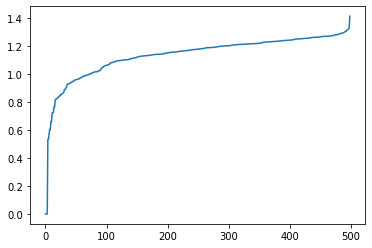

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

## Optimal value is found out at the point of highest curvature

In [ ]:
m = DBSCAN(eps=1.2, min_samples=4)
m.fit(X)

DBSCAN(algorithm='auto', eps=1.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [ ]:
labels_m = m.labels_
labels_m

array([-1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
       -1,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,
       -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1,  1,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,
        0, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,
        0, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1, -1,  0,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0, -1, -1, -1,
       -1,  0, -1,  0, -1

In [ ]:
sample_cores = np.zeros_like(labels_m,dtype=bool)

In [ ]:
sample_cores[m.core_sample_indices_]=True
sample_cores

array([False, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False,  True, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,

In [ ]:
n_clusters = len(set(labels_m)) - (1 if -1 in labels_m else 0)
n_clusters

2

In [ ]:
print(metrics.silhouette_score(X,labels_m))

0.005026229148621427


### Birch Model

In [ ]:
from sklearn.cluster import Birch

In [ ]:
model_b = Birch(threshold=.01,n_clusters=4)

In [ ]:
model_b.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=4,
      threshold=0.01)

In [ ]:
yhat = model_b.predict(X)

In [ ]:
yhat

array([1, 1, 1, 3, 2, 1, 3, 1, 2, 2, 3, 1, 1, 1, 2, 0, 1, 1, 3, 3, 1, 0,
       2, 1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 3, 3, 1, 3, 1, 1, 3, 0, 1, 1,
       1, 3, 2, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1,
       1, 0, 3, 0, 2, 3, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 3, 0, 0, 3,
       3, 3, 2, 3, 1, 0, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 0,
       1, 2, 0, 1, 1, 3, 3, 0, 2, 2, 1, 1, 3, 1, 2, 2, 3, 2, 1, 0, 1, 3,
       1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 0, 0, 1,
       3, 3, 3, 0, 1, 1, 1, 0, 0, 3, 1, 0, 3, 1, 0, 2, 3, 1, 1, 2, 0, 1,
       1, 0, 2, 0, 0, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 0, 3, 3, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 1, 1, 2, 1, 1,
       0, 0, 2, 3, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1,
       2, 0, 1, 1, 1, 0, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1,
       1, 0, 2, 3, 3, 3, 3, 3, 0, 1, 1, 2, 2, 3, 1,

In [ ]:
from numpy import unique
from numpy import where

In [ ]:
clusters_b = unique(yhat)
clusters_b

array([0, 1, 2, 3])

In [ ]:
for cluster in clusters:
  get_row = where(yhat==cluster)

In [ ]:
get_row

(array([  4,   8,   9,  14,  22,  46,  48,  70,  78,  90, 104, 106, 107,
        108, 111, 118, 119, 124, 125, 127, 139, 169, 173, 178, 195, 196,
        197, 198, 199, 200, 203, 204, 206, 207, 214, 229, 239, 244, 248,
        251, 256, 259, 264, 288, 297, 298, 302, 307, 308, 332, 344, 349,
        357, 365, 380, 382, 383, 386, 388, 391, 399, 407, 409, 411, 414,
        426, 427, 429, 441, 443, 445, 453, 463, 464, 467, 473, 486, 488]),)

In [ ]:

no_of_clusters = list(range(2,7))
silhouette_score_list = []

for k in no_of_clusters:
    # Creating a Kmeans class instance with k clusters
    model_b = Birch(n_clusters=k,threshold=.01)
    
    # Build the model using the data and predict the clusters
    clusters_b = model_b.fit_predict(X)
    
    # Append the inertia (wcss) to the list named "wcss"
    silhouette_score_list.append(silhouette_score(X,clusters_b))

In [ ]:
silhouette_score_list

[0.010357087525672989,
 0.011173203318580198,
 0.004504164656293442,
 0.0010137301767232404,
 0.0024265681641004694]

Text(0, 0.5, 'Silhouette Coefficient')

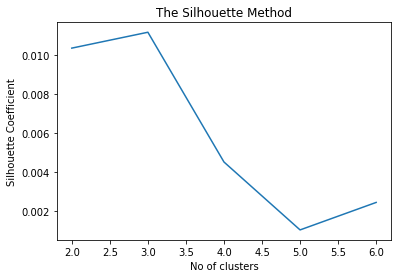

In [ ]:
plt.plot(no_of_clusters,silhouette_score_list)
plt.title('The Silhouette Method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Coefficient')

In [ ]:
print(metrics.silhouette_score(X,clusters_b))

0.0024265681641004694


#End